### Hough Line Transform using HoughLines() method

In [1]:
#Hough Transformation Algorithm
#1. Edge Detection using canny edge detector
#2. mapping of edge points to the Hough Space and storage in an accumulator
#3. interpretation of the accumulator to yield lines of infinite lenght. The interpretation is done by thresholding and possibly other constraints
#4. conversion of infinite lines to finite lines

In [2]:
import cv2
import numpy as np

In [3]:
img = cv2.imread('./data/sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
#Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
edges = cv2.Canny(gray, 50,150, apertureSize=3)

In [5]:
#HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])
#image: source image
#lines: output vector of lines. Each line is represented by a 2 or 3 element vector (rho, theta) or 
#(rho, theta, votes). rho is the distance from the coordinate origin (0,0) (top left corner of image).
#theta is the line rotation angle in radians. votes is the value of accumulator
#rho: distance resolution of the accumulator in pixels
#theta: angle resolution of the accumulator in pixels
#threshold: accumulator threshold param. Only those lines are returned that get enough votes

lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
print(lines)
#the lines returned are in the polar coordinate system
print(len(lines))

[[[ 3.6100000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  1.5707964e+00]]

 [[ 2.1200000e+02  3.4906585e-02]]

 [[ 2.1600000e+02  3.4906585e-02]]

 [[ 2.1600000e+02  1.5707964e+00]]

 [[-3.4900000e+02  3.1241393e+00]]

 [[ 1.6900000e+02  1.5707964e+00]]

 [[ 2.5700000e+02  1.7453292e-02]]

 [[ 2.1200000e+02  1.5707964e+00]]

 [[-3.9300000e+02  3.1066861e+00]]

 [[-4.3600000e+02  3.0892327e+00]]

 [[ 2.6000000e+02  1.7453292e-02]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[ 8.3000000e+01  8.7266460e-02]]

 [[-3.4500000e+02  3.1241393e+00]]

 [[-4.9700000e+02  3.0717795e+00]]

 [[-4.8400000e+02  3.0717795e+00]]

 [[-3.9100000e+02  3.1066861e+00]]

 [[-4.3900000e+02  3.0892327e+00]]

 [[ 7.9000000e+01  8.7266460e-02]]

 [[ 1.7100000e+02  5.2359879e-02]]

 [[ 4.1000000e+02  1.5707964e+00]]

 [[-4.9100000e+02  3.0717795e+00]]

 [[-5.0300000e+02  3.0717795e+00]]

 [[-5.0900000e+02  3.0717795e+00]]

 [[ 3.1100000e+02  1.5707964

In [6]:
lines[0][0]

array([361.       ,   1.5707964], dtype=float32)

In [7]:
lines[1][0]

array([357.       ,   1.5707964], dtype=float32)

In [8]:
lines[28][0]

array([309.       ,   1.5707964], dtype=float32)

In [9]:
rho_test, theta_test = lines[28][0]
print(rho_test, theta_test)
a_test = np.cos(theta_test)
b_test = np.sin(theta_test)
print(a_test)
print(b_test)
x0_test = a_test*rho_test
y0_test = b_test*rho_test
print(x0_test)
print(y0_test)
x1_test = int(x0_test + 1000 * (-b_test))
y1_test = int(y0_test + 1000 * (a_test))
x2_test = int(x0_test - 1000 * (-b_test))
y2_test = int(y0_test - 1000 * (a_test))
print(x1_test, y1_test, x2_test, y2_test)

cv2.line(img, (x1_test,y1_test), (x2_test,y2_test), (255,255,0), 2)

309.0 1.5707964
-4.371139e-08
1.0
-1.3506819e-05
309.0
-1000 308 999 309


array([[[177, 172, 163],
        [172, 167, 158],
        [173, 166, 157],
        ...,
        [213, 207, 202],
        [213, 207, 202],
        [213, 207, 202]],

       [[176, 171, 162],
        [172, 167, 158],
        [174, 167, 158],
        ...,
        [213, 207, 202],
        [213, 207, 202],
        [213, 207, 202]],

       [[175, 170, 161],
        [171, 166, 157],
        [173, 166, 157],
        ...,
        [213, 207, 202],
        [213, 207, 202],
        [213, 207, 202]],

       ...,

       [[ 45,  45,  45],
        [ 46,  46,  46],
        [ 45,  45,  45],
        ...,
        [138, 136, 136],
        [138, 136, 136],
        [135, 133, 133]],

       [[ 47,  47,  47],
        [ 48,  48,  48],
        [ 47,  47,  47],
        ...,
        [135, 133, 133],
        [135, 133, 133],
        [133, 131, 131]],

       [[ 47,  47,  47],
        [ 48,  48,  48],
        [ 47,  47,  47],
        ...,
        [135, 133, 133],
        [135, 133, 133],
        [133, 131, 131]]

In [10]:
for line in lines:
    #rho is distance from coordinate 0,0 (top left)
    #theta is the line rotation angle in radians
    rho, theta = line[0]
    #convert polar coords into cartesian coords for the line method
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    #x1 stores the rouned off values of (r*cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    #y1 stores the rounded off value of (r * sin(theta) + 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    #x2 stores the rounded off value of (r*cos(theta) + 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    #y2 stores the rounded off value of (r* sin(theta) - 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1,y1), (x2,y2), (0,0,255),2)

In [11]:
cv2.imshow('img', img)
cv2.imshow('edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

You can see that the lines draw are infinit. They go from 1 edge to the other and don't stop.
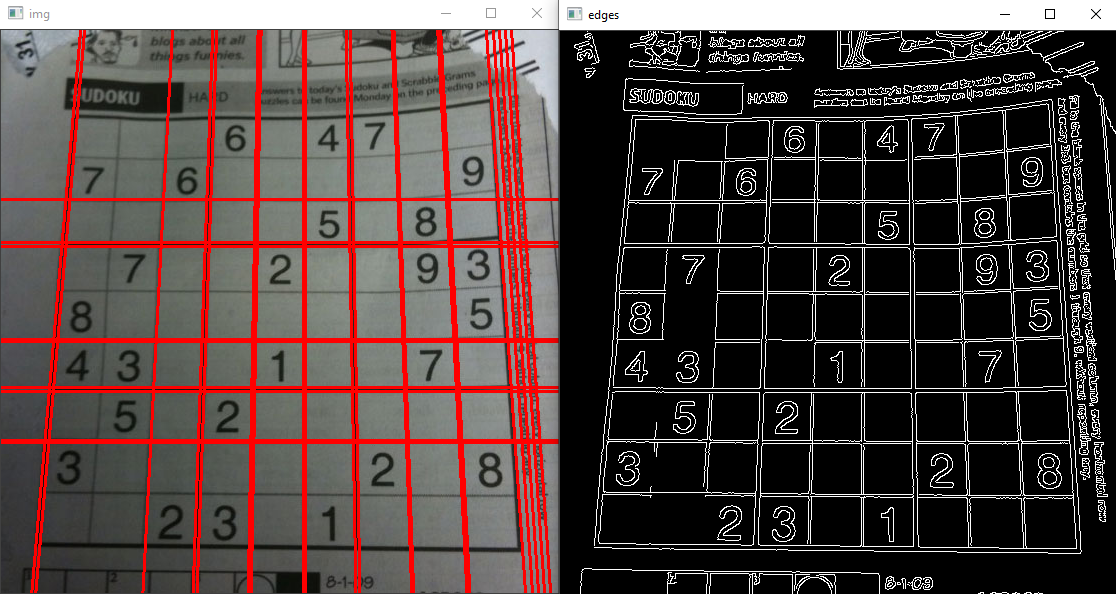
This problem can be solved using the other HoughLineP() method